# Topics

## 1. Image Manipulation



## On your labtop, do
        > pip install scikit-image

## An image in Python is no more or less than a 2D numpy array!

In [1]:
%matplotlib inline
'''
I need to upload moon.gif and lena512.jpg
'''
import matplotlib.pyplot as plt
import numpy as np
import os
from pdb import set_trace
from copy import copy

# ----> New Import! <------
import matplotlib.image as mpimg


<class 'numpy.ndarray'> (512, 512, 4) uint8


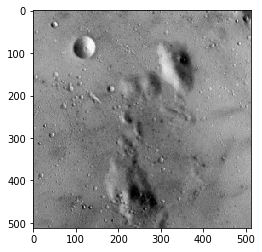

In [2]:
'''

A RGBA images -- with four channels.  
The last one, the "alpha-channel", allows for transparency, 

'''

moon_im=mpimg.imread('moon.gif')
print(type(moon_im), moon_im.shape, moon_im.dtype)
plt.imshow(moon_im)

plt.show()

[[255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]
 [255 255 255 255 255]]


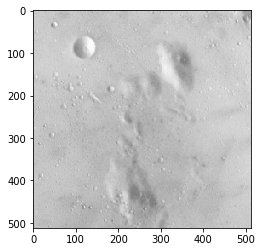

In [3]:
# this shows the image is not transparent
print(moon_im[:5,:5, 3])

moon_copy = copy(moon_im)
# make it 50% transparent
moon_copy[:,:,3] = 127

plt.imshow(moon_copy)
plt.show()

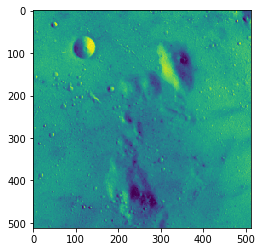

In [4]:
'''
Let's pick one channel, say R

Shown in false color

'''

moon = moon_im[:, :, 0]
plt.imshow(moon)
plt.show()

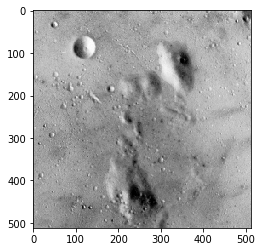

In [5]:
'''Show the above image in gray scale'''
import matplotlib.cm as cm
plt.imshow(moon, cmap = cm.Greys_r)
plt.show()


<class 'numpy.ndarray'> (512, 512) uint8


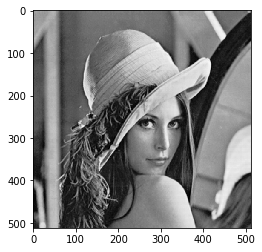

In [6]:
lena = mpimg.imread('lena512.jpg')
print(type(lena), lena.shape, lena.dtype)
plt.imshow(lena,  cmap = cm.Greys_r)
plt.show()

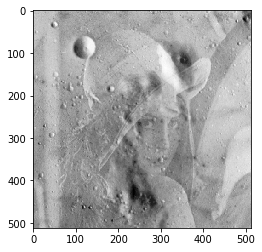

In [7]:
'''
Blending
imshow() does a quiet conversion from float to int

'''
# To avoid saturation (just as for sound)
wt1 = 0.25
wt2 = 1 - wt1
# you can do this because both images are 512x512 arrays
blend =wt1*lena + wt2*moon
plt.imshow(blend,  cmap = cm.Greys_r)
plt.show()

In [8]:
x = np.arange(10)
print(x)
print(np.roll(x, 0))
print(np.roll(x, 1))
print(np.roll(x, 2))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[9 0 1 2 3 4 5 6 7 8]
[8 9 0 1 2 3 4 5 6 7]


## Breakout Exercise:
## "Roll" every column of the Lena image by 100 pixels

## Breakout Exercise:

### Write a short program that creates something similar to the following effect (see image below)

## i) np.arctan() vs np.arctan2()

In [9]:
'''
np.arctan(y/x) only gives angles beween -90 and +90.

depending on the sign of (y/x).  If (y/x) < 0, it doesn't make the distinction  
between whether x < 0 or y < 0.  Put it another way, it doesn't know 
about 2nd and 3rd quandrants.
'''

import numpy as np

x = np.array([-1, +1, +1, -1])
y = np.array([-1, -1, +1, +1])
ang = np.arctan(y/x) * 180. / np.pi
print(ang)

[ 45. -45.  45. -45.]


In [10]:
'''
np.arctan2(y, x) is much more intelligent...

But note the syntactical difference between np.arctan and np.arctan2.

I would recommend to exclusively use np.arctan2() to avoid possible 
mis-identification of quadrants.

'''

import numpy as np

x = np.array([-1, +1, +1, -1])
y = np.array([-1, -1, +1, +1])
ang2 = np.arctan2(y, x) * 180 / np.pi
print(ang2)

[-135.  -45.   45.  135.]


## ii) Difference between np.concatenate(), np.column_stack(), np.row_stack()

In [11]:
a = np.arange(10)
b = np.arange(10)*2
print('a:', a)
print('b:', b)

# note the argument should be a tuple
concat = np.concatenate( (a, b) )
print('concat shape', concat.shape)
print('concat:', concat)

# the argument also should be a tuple
col_stak = np.column_stack( (a, b) )
print('col_stack shape:', col_stak.shape)
print('col_stack:\n', col_stak)


a: [0 1 2 3 4 5 6 7 8 9]
b: [ 0  2  4  6  8 10 12 14 16 18]
concat shape (20,)
concat: [ 0  1  2  3  4  5  6  7  8  9  0  2  4  6  8 10 12 14 16 18]
col_stack shape: (10, 2)
col_stack:
 [[ 0  0]
 [ 1  2]
 [ 2  4]
 [ 3  6]
 [ 4  8]
 [ 5 10]
 [ 6 12]
 [ 7 14]
 [ 8 16]
 [ 9 18]]


## Tiny Breakout: Is there a np.row_stack?  

## And if so, what's the relationship between the results of column_stack() and row_stack() performed on the same two arrays?


## Try it out!

xy shape: (262144, 2)
Check: 512^2 =  262144


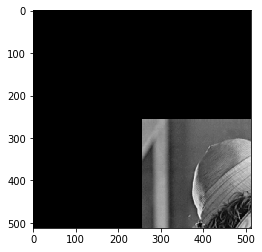

In [15]:
# -------------> New Import!!!! <-----------------
from skimage.transform import warp

def shift_left(xy):
    '''
    xy are all possible combinations of indices (coordinates) 
    of the pixels as a 2D array. 
    
    xy[:, 0] --> all the x values
    xy[:, 1] --> all the y values
    '''
    print('xy shape:', xy.shape)
    print('Check: 512^2 = ', 512**2)
    xy_shift = copy(xy)
    xy_shift[:, 0] = xy[:, 0] - 256
    xy_shift[:, 1] = xy[:, 1] - 256
    
    
    # note: the location label [0, 0] becomes [100, 0]
    # so the pixel at the location [0, 0] is now  
    # assigned the pixel value at [100, 0]; so the whole image
    # get shifted to the right.
    # set_trace()
    # print(xy.shape)

    # more succinctly:
    # xy[:, 0] -= 100; return xy
    return xy_shift


lena_shift = warp(lena, shift_left)
plt.imshow(lena_shift, cmap=plt.cm.gray)
plt.show()

## Quick review of the basics of Conversion between Cartesian and Polar Coordinates, back and forth -- in preparation for the next breakout exercise.

## Breakout Exercise -- Conversion between Cartesian and Polar Coordinates

- ### Write a function and call it do_nothing() that takes xy as input and do the conversion from $(x, y)$ to $(r, \theta)$ and then back to $(x, y)$.  (Hint: first you need to find the coordinate for the center of the image (xc, yc).)

- ### Show that if the transformation is performed by do_nothing(), you get the original image back

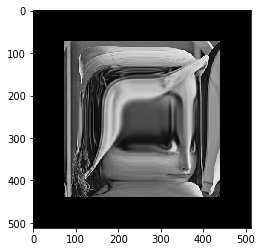

In [73]:
from skimage.transform import warp
def do_nothing(xy):
    xy_center = copy(xy)
    xy_center = np.mean(xy)
  
    x = xy - xy_center
    y = xy - xy_center
#     print(x,y)
    r = np.sqrt(x**2 + y**2)
    r = (r + r**2 + 0.1*r**3)*0.0002
    theta = np.arctan2(x,y)
    x = np.cos(theta)*r
    y = np.sin(theta)*r
    
    return np.column_stack((x,y)+xy_center)
    print(x,y)
#     xy_center[:,1] -= xy_center

#     xy[:, 0] = np.sqrt(xy[:, 0]**2 + xy[0, 1]**2)
    
#     xy[0, 1] = np.arctan(xy[:,0]/xy[:,1])
#     print(xy[:,0], xy[:,1])
#     xynew_center = copy(xy)
#     xynew_center[:,0] = np.sqrt(xy_center[:,0]**2 + xy_center[:,1]**2)
#     xynew_center[:,1] = np.arctan2(xy_center[:,1],xy_center[:,0])
#     print(xynew_center[:,0])
#     print(xynew_center[:,1])
#     return xy_center

lena_center = warp(lena, do_nothing)
plt.imshow(lena_center, cmap=plt.cm.gray)
plt.show()

## Can check what xc and yc are by using set_trace.

## Breakout Exercise:
## Simulate Fish Eye Lens:
## $r \rightarrow r + r^2$


In [ ]:
def rotate(xy, theta = np.pi/2, blowup = 1.):
    x = xy - xy_center
    y = xy - xy_center
    x = x*np.cos(theta) - y*np.sin(theta)
    y = y*np.cos(theta) + x*np.sin(theta)
    
    

In [ ]:
np.radians(60)

## End of week 10-2